In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from multiprocessing import Pool
from matplotlib.colors import ListedColormap

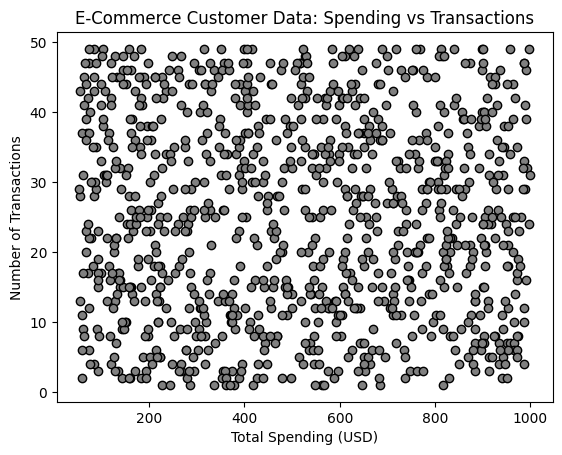

In [2]:
np.random.seed(42)

# Let's assume we have two main features for customers:
# 1. Total spending (USD)
# 2. Number of transactions

# Simulating data for 1000 customers
customer_spending = np.random.uniform(50, 1000, 1000)  # Total spending between $50 and $1000
num_transactions = np.random.randint(1, 50, 1000)      # Number of transactions between 1 and 50

X = np.column_stack((customer_spending, num_transactions))

plt.scatter(X[:, 0], X[:, 1], c='gray', marker='o', edgecolor='k')
plt.title("E-Commerce Customer Data: Spending vs Transactions")
plt.xlabel("Total Spending (USD)")
plt.ylabel("Number of Transactions")
plt.show()


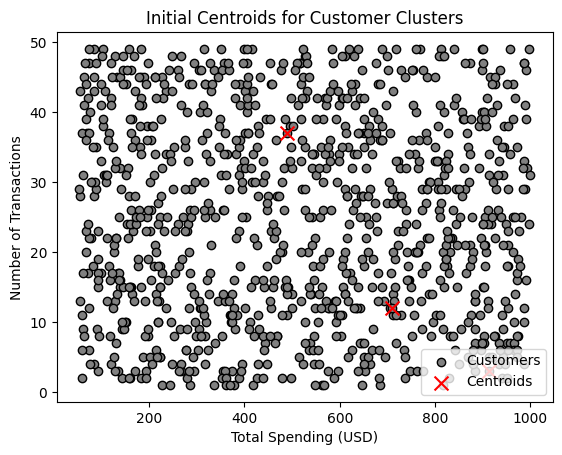

In [3]:
def initialize_centroids(X, k):
    centroids = np.zeros((k, X.shape[1]))
    centroids[0] = X[np.random.randint(X.shape[0])]
    for i in range(1, k):
        distances = np.array([min(np.linalg.norm(x - centroids[j])**2 for j in range(i)) for x in X])
        probabilities = distances / distances.sum()
        centroids[i] = X[np.random.choice(range(X.shape[0]), p=probabilities)]
    return centroids

k = 3
centroids = initialize_centroids(X, k)

plt.scatter(X[:, 0], X[:, 1], c='gray', marker='o', edgecolor='k', label='Customers')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.title("Initial Centroids for Customer Clusters")
plt.xlabel("Total Spending (USD)")
plt.ylabel("Number of Transactions")
plt.legend()
plt.show()

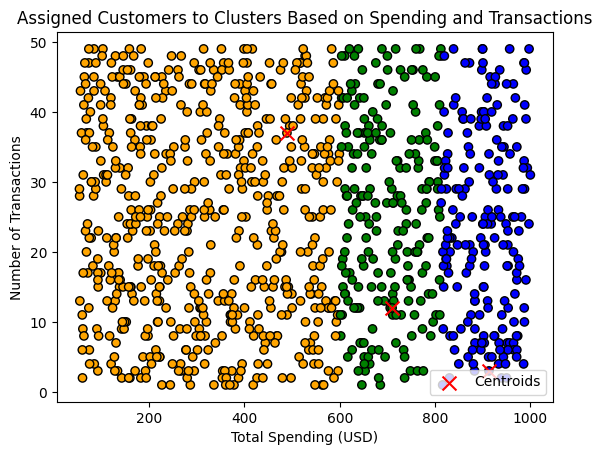

In [4]:
from functools import partial

# Assign each customer to the nearest centroid
def compute_distance(x, centroids):
    distances = np.linalg.norm(x - centroids, axis=1)
    return np.argmin(distances)

def assign_clusters(X, centroids):
    # Create a Pool of workers and map the compute_distance function to the data points
    with Pool() as pool:
        func = partial(compute_distance, centroids=centroids)
        labels = pool.map(func, X)

    return np.array(labels)

clusters = assign_clusters(X, centroids)

plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap=ListedColormap(['orange', 'blue', 'green']), marker='o', edgecolor='k')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.title("Assigned Customers to Clusters Based on Spending and Transactions")
plt.xlabel("Total Spending (USD)")
plt.ylabel("Number of Transactions")
plt.legend()
plt.show()

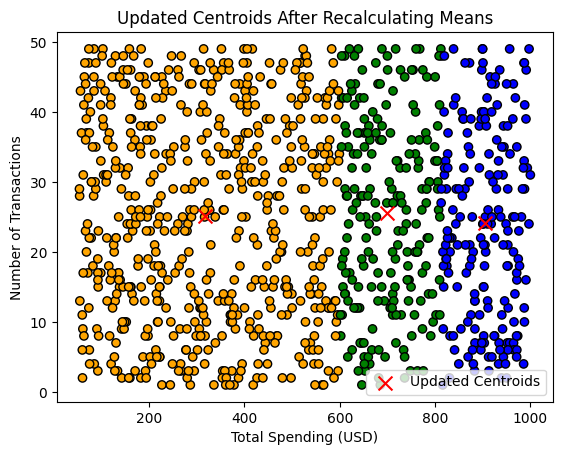

In [5]:
# Update centroids based on cluster means
def update_centroids(X, clusters, k):
    new_centroids = np.array([X[clusters == i].mean(axis=0) for i in range(k)])
    return new_centroids

new_centroids = update_centroids(X, clusters, k)

plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap=ListedColormap(['orange', 'blue', 'green']), marker='o', edgecolor='k')
plt.scatter(new_centroids[:, 0], new_centroids[:, 1], c='red', marker='x', s=100, label='Updated Centroids')
plt.title("Updated Centroids After Recalculating Means")
plt.xlabel("Total Spending (USD)")
plt.ylabel("Number of Transactions")
plt.legend()
plt.show()

In [6]:
# Iterating the algorithm with sleep delay to visualize steps
import time

def kmeans(X, k, max_iters=10, sleep_time=2):
    centroids = initialize_centroids(X, k)
    for i in range(max_iters):
        clusters = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, clusters, k)

        plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap=ListedColormap(['orange', 'blue', 'green']), marker='o', edgecolor='k')
        plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100)
        plt.title(f"Iteration {i+1}: Clustering E-Commerce Customers")
        plt.xlabel("Total Spending (USD)")
        plt.ylabel("Number of Transactions")
        plt.show()

        time.sleep(sleep_time)

        # Check for convergence
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids

kmeans(X, k, sleep_time=2)

Output hidden; open in https://colab.research.google.com to view.